In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import glob as gb
import cv2
import matplotlib.pylab as plt
plt.style.use('ggplot')

### Dataset source: https://www.kaggle.com/datasets/annielu21/house-rooms

In [2]:
import warnings

warnings.filterwarnings("ignore", message="All log messages before absl::InitializeLog() is called are written to STDERR")
warnings.filterwarnings("ignore", message="Fallback to op-by-op mode because memset node breaks graph update")

In [3]:
from sklearn.model_selection import train_test_split
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

2024-06-24 07:48:03.094886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 07:48:03.094944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 07:48:03.096387: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
def set_random_seed(random_seed):
    random.seed(random_seed)
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)
    os.environ['PYTHONHASHSEED'] = str(random_seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [5]:
set_random_seed(42)

In [6]:
# Path gambar
img_path = '/kaggle/input/processed-room-image/clahe_processed_images'

input_dir = 'images'
output_dir = 'output'

# Membuat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)

In [7]:
# Membuat Folder Kategori
categories = ['bathroom', 'bedroom', 'dining', 'gaming', 
              'kitchen','laundry','living', 'office',
             'terrace', 'yard']

for category in categories:
    category_dir = os.path.join(output_dir, category)
    os.makedirs(category_dir, exist_ok=True)

In [8]:
# Memindahkan file ke folder yang dipilih
for root, dirs, files in os.walk(img_path):
    for file in files:
        category = os.path.basename(root)
        if category in categories:
            source_file = os.path.join(root, file)
            destination_dir = os.path.join(output_dir, category)
            shutil.copy(source_file, destination_dir)

# Menampilkan jumlah file dalam setiap kategori
for category in categories:
    category_dir = os.path.join(output_dir, category)
    num_files = len(os.listdir(category_dir))
    print(f"Total {category} files: {num_files}")

Total bathroom files: 740
Total bedroom files: 1083
Total dining files: 1178
Total gaming files: 1511
Total kitchen files: 1208
Total laundry files: 1589
Total living files: 1164
Total office files: 1241
Total terrace files: 1210
Total yard files: 1398


In [9]:
# Buat folder train, validation, dan test
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
    
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split data menjadi train, validation, dan test
for category in categories:
    category_dir = os.path.join(output_dir, category)
    images = os.listdir(category_dir)
    
    # Pembagian train, validation, test (70%, 15%, 15%)
    train_images, val_test_images = train_test_split(images, test_size=0.1, random_state=42)
    val_images, test_images = train_test_split(val_test_images, test_size=0.5, random_state=42)
    
    # Pindahkan gambar-gambar ke dalam folder train, validation, dan test
    for img in train_images:
        target_dir = os.path.join(train_dir, category)
        os.makedirs(target_dir, exist_ok=True)
        shutil.move(os.path.join(category_dir, img), os.path.join(target_dir, img))

    for img in val_images:
        target_dir = os.path.join(val_dir, category)
        os.makedirs(target_dir, exist_ok=True)
        shutil.move(os.path.join(category_dir, img), os.path.join(target_dir, img))
        
    for img in test_images:
        target_dir = os.path.join(test_dir, category)
        os.makedirs(target_dir, exist_ok=True)
        shutil.move(os.path.join(category_dir, img), os.path.join(target_dir, img))

In [10]:
# Cetak jumlah gambar dalam folder train
print("\nJumlah Gambar dalam Folder Train:")
for category in categories:
    train_category_dir = os.path.join(train_dir, category)
    num_train_images = len(os.listdir(train_category_dir))
    print(f"{category}: {num_train_images} gambar")

# Cetak jumlah gambar dalam folder validation
print("\nJumlah Gambar dalam Folder Validation:")
for category in categories:
    val_category_dir = os.path.join(val_dir, category)
    num_val_images = len(os.listdir(val_category_dir))
    print(f"{category}: {num_val_images} gambar")

# Cetak jumlah gambar dalam folder test
print("\nJumlah Gambar dalam Folder Test:")
for category in categories:
    test_category_dir = os.path.join(test_dir, category)
    num_test_images = len(os.listdir(test_category_dir))
    print(f"{category}: {num_test_images} gambar")


Jumlah Gambar dalam Folder Train:
bathroom: 666 gambar
bedroom: 974 gambar
dining: 1060 gambar
gaming: 1359 gambar
kitchen: 1087 gambar
laundry: 1430 gambar
living: 1047 gambar
office: 1116 gambar
terrace: 1089 gambar
yard: 1258 gambar

Jumlah Gambar dalam Folder Validation:
bathroom: 37 gambar
bedroom: 54 gambar
dining: 59 gambar
gaming: 76 gambar
kitchen: 60 gambar
laundry: 79 gambar
living: 58 gambar
office: 62 gambar
terrace: 60 gambar
yard: 70 gambar

Jumlah Gambar dalam Folder Test:
bathroom: 37 gambar
bedroom: 55 gambar
dining: 59 gambar
gaming: 76 gambar
kitchen: 61 gambar
laundry: 80 gambar
living: 59 gambar
office: 63 gambar
terrace: 61 gambar
yard: 70 gambar


Visualizing Images for Categories:

Contoh Gambar untuk Kategori bathroom:


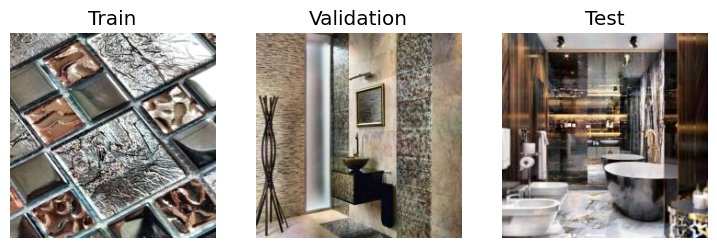


Contoh Gambar untuk Kategori yard:


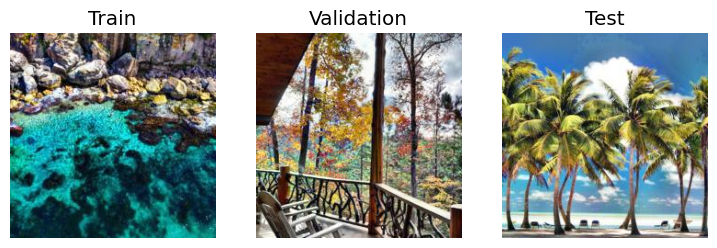


Contoh Gambar untuk Kategori living:


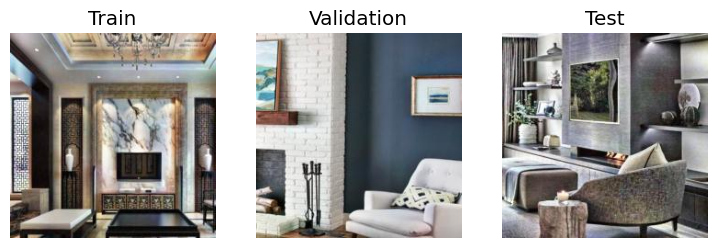


Contoh Gambar untuk Kategori laundry:


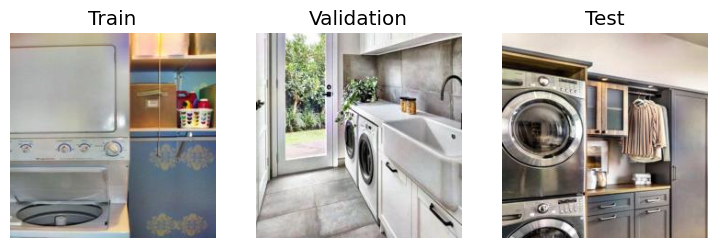


Contoh Gambar untuk Kategori gaming:


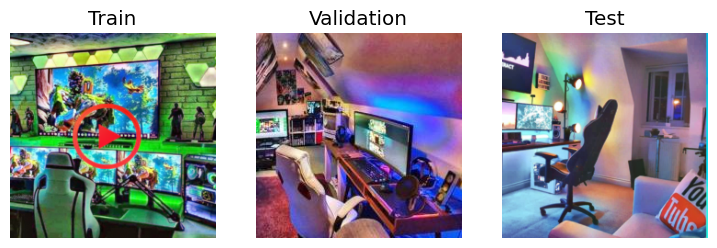


Contoh Gambar untuk Kategori kitchen:


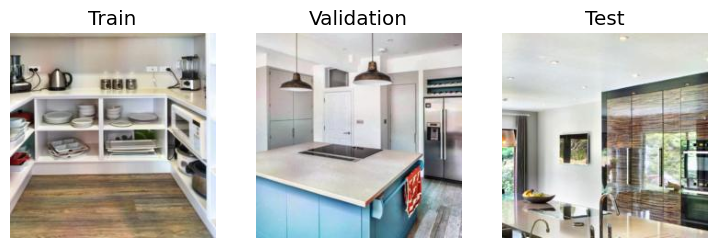


Contoh Gambar untuk Kategori office:


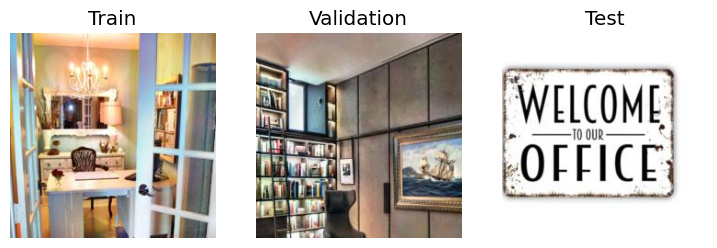


Contoh Gambar untuk Kategori dining:


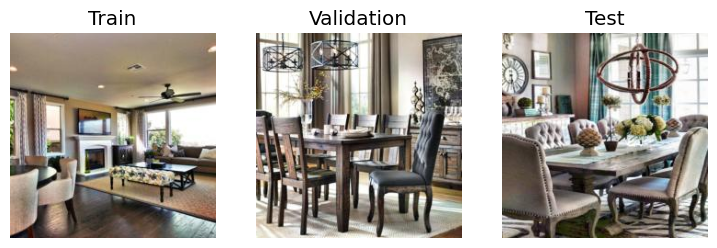


Contoh Gambar untuk Kategori bedroom:


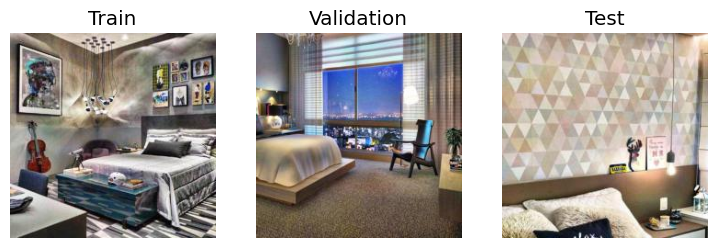


Contoh Gambar untuk Kategori terrace:


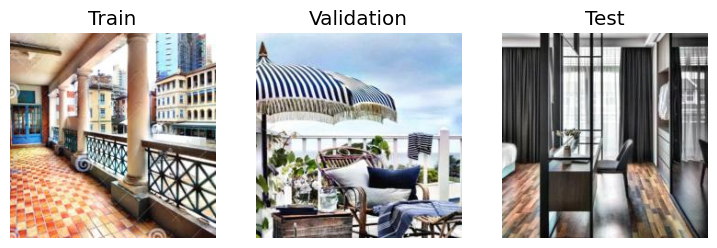

In [11]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_random_images(train_folder, val_folder, test_folder, num_images=1, figsize=(4, 4)):
    categories = os.listdir(train_folder)
    
    for category in categories:
        print(f"\nContoh Gambar untuk Kategori {category}:")
        fig, axes = plt.subplots(1, 3, figsize=(figsize[0] * 3, figsize[1]))

        folders = [train_folder, val_folder, test_folder]
        folder_names = ['Train', 'Validation', 'Test']
        
        for ax, folder, folder_name in zip(axes, folders, folder_names):
            category_dir = os.path.join(folder, category)
            images = os.listdir(category_dir)
            if len(images) > 0:
                img_file = random.choice(images)
                img_path = os.path.join(category_dir, img_file)
                img = mpimg.imread(img_path)
                ax.imshow(img)
                ax.axis("off")
                ax.set_title(folder_name)
            else:
                ax.axis("off")
                ax.set_title(f"No Images in {folder_name}")
        
        plt.show()

print('Visualizing Images for Categories:')
visualize_random_images(train_dir, val_dir, test_dir, figsize=(3, 3))

In [12]:
# Preprocess input images using MobilenetV3 preprocessing layers
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

# Menggunakan ImageDataGenerator untuk pelatihan 
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    rotation_range=10, 
    zoom_range=0.1,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,  
    vertical_flip=False,
    fill_mode='nearest'
)

traindata = train_datagen.flow_from_directory(
    directory=train_dir, 
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    shuffle=True)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255
)

valdata = val_datagen.flow_from_directory(
    directory=val_dir, 
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    shuffle=False)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255
)

testdata = test_datagen.flow_from_directory(
    directory=test_dir, 
    target_size=(224,224), 
    color_mode="rgb", 
    class_mode='categorical',
    shuffle=False)

Found 11076 images belonging to 10 classes.
Found 614 images belonging to 10 classes.
Found 621 images belonging to 10 classes.


In [13]:
print("Informasi Data Training:")
print(f"Jumlah sampel: {traindata.samples}")
print(f"Kelas: {traindata.class_indices}")
print(f"Shape gambar: {traindata.image_shape}")
print(f"Mode warna: {traindata.color_mode}")

print("\nInformasi Data Validasi:")
print(f"Jumlah sampel: {valdata.samples}")
print(f"Kelas: {valdata.class_indices}")
print(f"Shape gambar: {valdata.image_shape}")
print(f"Mode warna: {valdata.color_mode}")

print("\nInformasi Data Test:")
print(f"Jumlah sampel: {testdata.samples}")
print(f"Kelas: {testdata.class_indices}")
print(f"Shape gambar: {testdata.image_shape}")
print(f"Mode warna: {testdata.color_mode}")

Informasi Data Training:
Jumlah sampel: 11076
Kelas: {'bathroom': 0, 'bedroom': 1, 'dining': 2, 'gaming': 3, 'kitchen': 4, 'laundry': 5, 'living': 6, 'office': 7, 'terrace': 8, 'yard': 9}
Shape gambar: (224, 224, 3)
Mode warna: rgb

Informasi Data Validasi:
Jumlah sampel: 614
Kelas: {'bathroom': 0, 'bedroom': 1, 'dining': 2, 'gaming': 3, 'kitchen': 4, 'laundry': 5, 'living': 6, 'office': 7, 'terrace': 8, 'yard': 9}
Shape gambar: (224, 224, 3)
Mode warna: rgb

Informasi Data Test:
Jumlah sampel: 621
Kelas: {'bathroom': 0, 'bedroom': 1, 'dining': 2, 'gaming': 3, 'kitchen': 4, 'laundry': 5, 'living': 6, 'office': 7, 'terrace': 8, 'yard': 9}
Shape gambar: (224, 224, 3)
Mode warna: rgb


### MODELING

In [14]:
from tensorflow.keras.applications import MobileNetV3Small

base_model = MobileNetV3Small(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [15]:
# freeze all layer
for layer in base_model.layers:
    layer.trainable = False

In [16]:
# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Set memory growth for GPU
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [17]:
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from keras.regularizers import l2
import tensorflow as tf


model = Sequential()
model.add(Input(shape=(224, 224, 3)))
model.add(base_model)
model.add(Flatten())
model.add(Dense(len(categories), activation='softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobilenetV3small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       282,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,370 (4.66 MB)

 Trainable params: 282,250 (1.08 MB)

 Non-trainable params: 939,120 (3.58 MB)

In [18]:
from tensorflow.keras.optimizers import SGD  # Import SGD optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau


device_name = tf.test.gpu_device_name()

modelpath = './output/bestmodel.keras'

np.random.seed(42)

### train the model
with tf.device(device_name):
    
    optimizer = SGD()
    
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'])
    
    # Early stopping for val_accuracy
    early_stopping_acc = EarlyStopping(monitor='val_accuracy', patience=10, 
                                       restore_best_weights=True, mode='max')

    # Early stopping for val_loss
    early_stopping_loss = EarlyStopping(monitor='val_loss', patience=5, 
                                        restore_best_weights=True, mode='min')

    
    # Reduce learning rate when a metric has stopped improving
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, 
                                  patience=8, min_lr=0.000005, verbose=1)

    
    # Callback ModelCheckpoint untuk menyimpan bobot terbaik
    checkpoint = ModelCheckpoint(
        modelpath,
        monitor='val_accuracy',
        save_best_only=True,  # Hanya menyimpan bobot terbaik
        mode='max',  # Mode untuk membandingkan nilai metrik (misalnya 'max' untuk akurasi)
        verbose=1  # Menampilkan pesan saat menyimpan
    )

    # Train the model
    history = model.fit(x=traindata, validation_data=valdata, epochs=200, 
                        batch_size=32, callbacks=[early_stopping_acc, early_stopping_loss,
                                                  checkpoint])

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/347 ━━━━━━━━━━━━━━━━━━━━ 1:06:46 12s/step - accuracy: 0.0625 - loss: 2.4086

I0000 00:00:1719215317.027516     978 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.0997 - loss: 19.2176
Epoch 1: val_accuracy improved from -inf to 0.16124, saving model to ./output/bestmodel.keras
347/347 ━━━━━━━━━━━━━━━━━━━━ 146s 390ms/step - accuracy: 0.0998 - loss: 19.2172 - val_accuracy: 0.1612 - val_loss: 12.5673
Epoch 2/200
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.1280 - loss: 17.3057
Epoch 2: val_accuracy improved from 0.16124 to 0.17264, saving model to ./output/bestmodel.keras
347/347 ━━━━━━━━━━━━━━━━━━━━ 126s 356ms/step - accuracy: 0.1280 - loss: 17.3048 - val_accuracy: 0.1726 - val_loss: 12.7207
Epoch 3/200
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.1384 - loss: 16.0981
Epoch 3: val_accuracy did not improve from 0.17264
347/347 ━━━━━━━━━━━━━━━━━━━━ 125s 354ms/step - accuracy: 0.1384 - loss: 16.0974 - val_accuracy: 0.1254 - val_loss: 14.3876
Epoch 4/200
347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.1472 - loss: 16.2712
Epoch 4: val_accuracy improved from 0.172

In [19]:
# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(testdata)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.0766 - loss: 22.7406
Test Loss: 12.2868
Test Accuracy: 17.87%


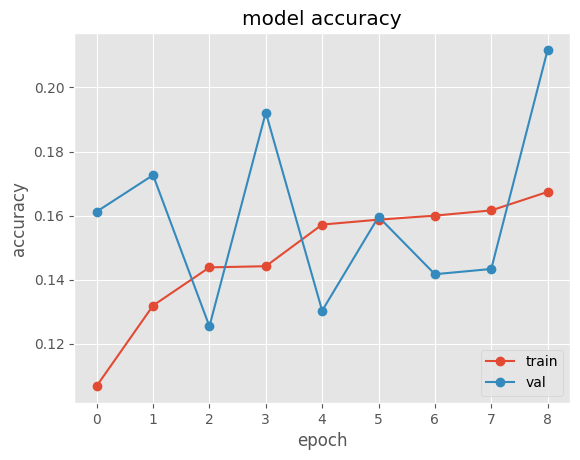

In [20]:
# Visualize the model

plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

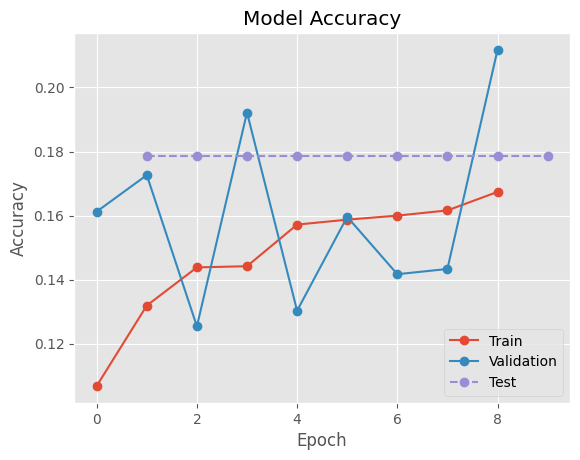

In [21]:
# Visualize the model accuracy including test accuracy
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')

# Menambahkan test accuracy ke grafik
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, [test_acc] * len(epochs), linestyle='--', marker='o')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')
plt.show()

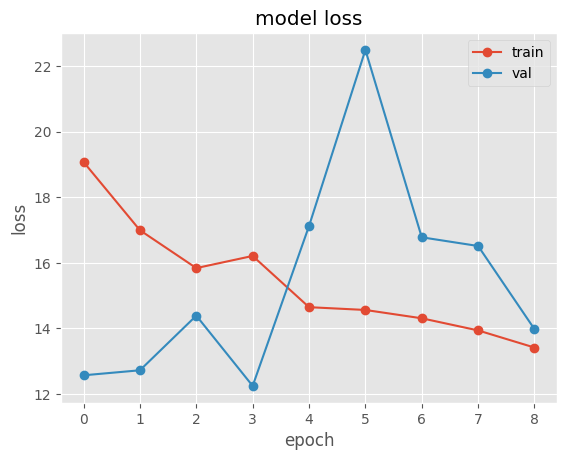

In [22]:
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi label kelas menggunakan model terhadap data uji
predictions = model.predict(testdata)
predicted_classes = np.argmax(predictions, axis=1)

# Ambil label sebenarnya dari data uji
true_classes = testdata.labels

# Dapatkan nama kelas
class_labels = list(testdata.class_indices.keys())

# Buat classification matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification matrix
print("Classification Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step
Classification Matrix:
[[ 0  0  1  0  0  0  0 35  0  1]
 [ 0  0  1  0  0  0  0 54  0  0]
 [ 0  0 12  0  0  0  0 42  0  5]
 [ 0  0  3  0  0  0  0 72  0  1]
 [ 0  0  2  0  0  0  0 55  0  4]
 [ 0  0  2  0  0  0  0 77  0  1]
 [ 0  0  7  0  0  0  1 50  0  1]
 [ 0  0  2  0  0  0  0 55  0  6]
 [ 0  0 14  0  0  0  0 32  0 15]
 [ 0  0  2  0  0  0  0 25  0 43]]

Classification Report:
              precision    recall  f1-score   support

    bathroom       0.00      0.00      0.00        37
     bedroom       0.00      0.00      0.00        55
      dining       0.26      0.20      0.23        59
      gaming       0.00      0.00      0.00        76
     kitchen       0.00      0.00      0.00        61
     laundry       0.00      0.00      0.00        80
      living       1.00      0.02      0.03        59
      office       0.11      0.87      0.20        63
     terrace       0.00      0.00      0.00        61
        yard       0.56      0.61      0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy adalah rasio dari jumlah prediksi yang benar (true predictions) dibagi dengan jumlah total instance dalam dataset. 

Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini dihitung sebagai rasio dari true positive (TP) dibagi oleh jumlah true positive dan false positive (FP). 

 Recall mengukur seberapa baik model dalam menemukan semua instance yang benar dari kelas yang diinginkan. Ini dihitung sebagai rasio dari true positive (TP) dibagi oleh jumlah true positive dan false negative (FN). 

F1-score adalah rata-rata harmonik dari precision dan recall. Ini memberikan keseimbangan antara precision dan recall.